<a href="https://colab.research.google.com/github/Machine-Learning-Tokyo/Intro-to-GANs/blob/master/more_advanced/Cond_DCGAN_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conditional DCGAN Interpolation

In [0]:
#@title Imports
%%capture
!pip install pydrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
from IPython.display import HTML
from keras.models import load_model

In [0]:
#@title Get utility functions
%%capture
%cd /content
%rm -r /content/23dbccd7e2008a51dde92c5889e4d940
!git clone https://gist.github.com/dkatsios/23dbccd7e2008a51dde92c5889e4d940.git
%cd 23dbccd7e2008a51dde92c5889e4d940
from interpolation_utils import *
%cd /content

In [0]:
#@title Get trained generator model


%%capture
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
%cd /content
downloaded = drive.CreateFile({'id': '1Fi0nLclyq7qjyjWZLpKH56z3Jh6gzhho'})
downloaded.GetContentFile('fashion_cond_dcgan_gen.h5')

generator = load_model('/content/fashion_cond_dcgan_gen.h5')

### Generate images

In [0]:
images_num = 80
samples_gen = samples_generator(generator, images_num)

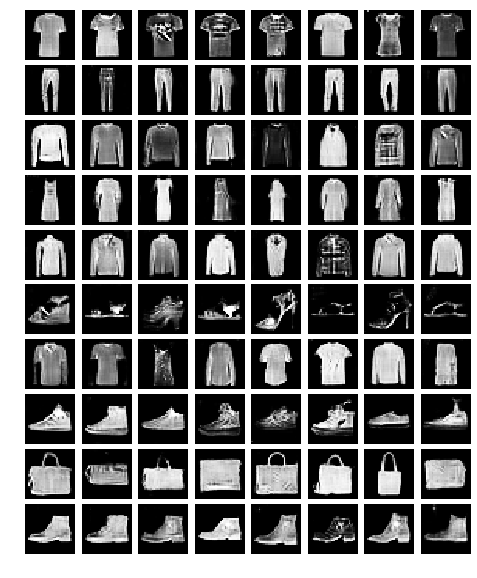

In [0]:
imgs, noise, classes = next(samples_gen)
plot_imgs(imgs, images_num)

### Interpolate between images

In [0]:
im_1 = 3, 1
im_2 = 8, 3

In [0]:
#@title Plot interpolation
HTML(plot_results(*plot_inter(get_inter_imgs(im_1, im_2, noise, classes, generator)), inches=2).to_jshtml())